# Coursera Capstone Project - Car Accident Severity

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to predict the severity of a number of car accidents. Specifically, this report will be targeted to car drivers living in **Seattle**, Washington, USA.

Since there are lots of variables that affect car accident severity, we will try to determine **which variables are highly correlated with more severe accidents**. We are also particularly interested in **the effects of the weather condition**.


## Data <a name="data"></a>

Based on definition of our problem, factors that couold influence the classification severity is:
* Weather conditions
* Collision Type
* Vehicle Count

However, there are more factors that may influence the severity of a car accident which will be addressed throughout this notebook.

Data-Collisions csv file will be needed to extract/generate the required information. It consists of collisions from years 2004 to present 



In [49]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Data Preprocessing & Cleaning

In [50]:
df=df_data_1.loc[:,['SEVERITYCODE','WEATHER', 'COLLISIONTYPE', 'VEHCOUNT']]
df.set_index('SEVERITYCODE')
df.head()

,SEVERITYCODE,WEATHER,COLLISIONTYPE,VEHCOUNT
0,2,Overcast,Angles,2
1,1,Raining,Sideswipe,2
2,1,Overcast,Parked Car,3
3,1,Clear,Other,3
4,2,Raining,Angles,2


In [51]:
df.shape

(194673, 4)

In [52]:
print(df.isnull().sum())

SEVERITYCODE        0
WEATHER          5081
COLLISIONTYPE    4904
VEHCOUNT            0
dtype: int64


In [53]:
df=df.dropna()

In [54]:
print(df.isnull().sum())

SEVERITYCODE     0
WEATHER          0
COLLISIONTYPE    0
VEHCOUNT         0
dtype: int64


In [55]:
df.drop_duplicates()

,SEVERITYCODE,WEATHER,COLLISIONTYPE,VEHCOUNT
0,2,Overcast,Angles,2
1,1,Raining,Sideswipe,2
2,1,Overcast,Parked Car,3
3,1,Clear,Other,3
4,2,Raining,Angles,2
5,1,Clear,Angles,2
6,1,Raining,Angles,2
7,2,Clear,Cycles,1
8,1,Clear,Parked Car,2
9,2,Clear,Angles,2


In [56]:
df.shape

(189571, 4)

In [57]:
df['SEVERITYCODE'].value_counts()

1    132480
2     57091
Name: SEVERITYCODE, dtype: int64

In [58]:
from sklearn.utils import resample

In [59]:
df_max=df[df.SEVERITYCODE==1]
df_min=df[df.SEVERITYCODE==2]

df_max_sample=resample(df_max,replace=False, n_samples=57091, random_state=123)

balanced_df=pd.concat([df_max_sample,df_min])

balanced_df.SEVERITYCODE.value_counts()

2    57091
1    57091
Name: SEVERITYCODE, dtype: int64

In [60]:
balanced_df.shape

(114182, 4)

In [61]:
balanced_df['WEATHER'].value_counts()

Clear                       68303
Raining                     20595
Overcast                    16930
Unknown                      6969
Snowing                       490
Other                         423
Fog/Smog/Smoke                359
Sleet/Hail/Freezing Rain       68
Blowing Sand/Dirt              28
Severe Crosswind               14
Partly Cloudy                   3
Name: WEATHER, dtype: int64

In [62]:
balanced_df['COLLISIONTYPE'].value_counts()

Rear Ended    23077
Angles        22752
Parked Car    22062
Other         13692
Sideswipe      9388
Left Turn      9004
Pedestrian     6196
Cycles         5037
Right Turn     1612
Head On        1362
Name: COLLISIONTYPE, dtype: int64

In [63]:
balanced_df['VEHCOUNT'].value_counts()

2     84049
1     19104
3      8654
4      1647
5       376
0       195
6       101
7        33
8        10
9         6
11        4
10        2
12        1
Name: VEHCOUNT, dtype: int64

## Data Visualization

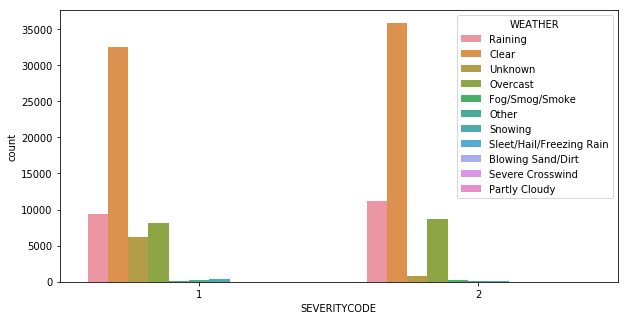

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(x='SEVERITYCODE', hue='WEATHER', data=(balanced_df))

The figure above does not show much correlation between the severity code and weather. However, it shows that rainy weather is more likely to more severe car accidents causing injury.

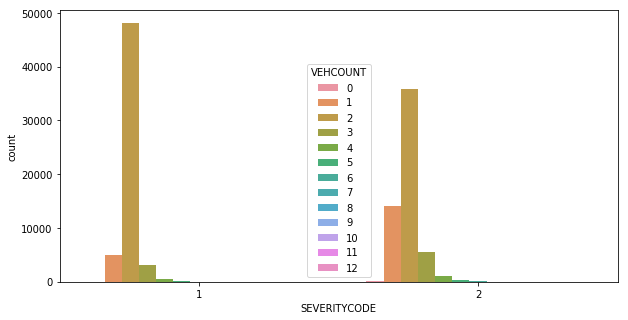

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(x='SEVERITYCODE', hue='VEHCOUNT', data=(balanced_df))

The graph above shows that most car accidents occur between 2 vehicles leading mostly to property damage rather than injury. In addition, car accidents involving only 1 or 3 vehicles are shown to be severe.

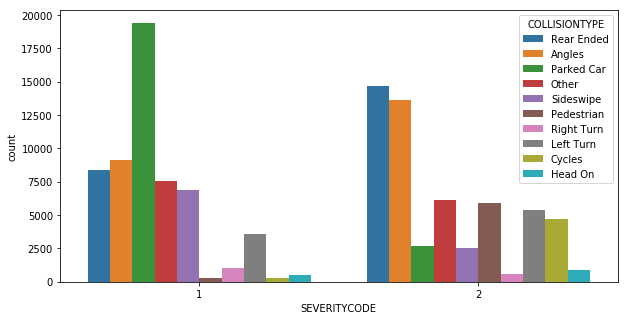

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x='SEVERITYCODE', hue='COLLISIONTYPE', data=(balanced_df))

The above chart shows a good correlation between the severity code and the collision type. For instance, it shows that parked cars aren't as severe as rear ended or angled collisions. 

## Machine Learning

For the machine learning model, we will focus on **WEATHER** and **COLLISIONTYPE** as our prime variables since VEHCOUNT does not provide a good correlation with SEVERITYCODE.

In [67]:
final_df=balanced_df.loc[:,['SEVERITYCODE','WEATHER','COLLISIONTYPE']]
final_df.head(5)

,SEVERITYCODE,WEATHER,COLLISIONTYPE
95621,1,Raining,Rear Ended
5230,1,Clear,Angles
29261,1,Raining,Rear Ended
131157,1,Clear,Parked Car
36942,1,Clear,Parked Car


In [68]:
final_df.drop_duplicates()

,SEVERITYCODE,WEATHER,COLLISIONTYPE
95621,1,Raining,Rear Ended
5230,1,Clear,Angles
131157,1,Clear,Parked Car
118711,1,Raining,Angles
58024,1,Unknown,Parked Car
118973,1,Clear,Other
69691,1,Overcast,Rear Ended
191859,1,Overcast,Sideswipe
25751,1,Fog/Smog/Smoke,Rear Ended
30085,1,Raining,Pedestrian


In [69]:
X = pd.get_dummies(data=final_df, columns=['WEATHER','COLLISIONTYPE'])
y = balanced_df[['SEVERITYCODE']].values
X.head(10)

,SEVERITYCODE,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,...,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe
95621,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5230,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
29261,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
131157,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36942,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30120,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
118711,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
58024,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
92981,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
118973,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (91345, 22) (91345, 1)
Test set: (22837, 22) (22837, 1)


In [71]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


array([[-1.        , -0.0156615 , -1.22014914, -0.05616066, -0.06097858,
        -0.41723354, -0.00512587,  2.13170383, -0.01107368, -0.02441097,
        -0.06564975, -0.25495381, -0.49884478, -0.21482462, -0.10987414,
        -0.29258718, -0.36912378, -0.48937916, -0.23953665,  1.9869248 ,
        -0.11966611, -0.299308  ],
       [-1.        , -0.0156615 ,  0.81957194, -0.05616066, -0.06097858,
        -0.41723354, -0.00512587, -0.46910832, -0.01107368, -0.02441097,
        -0.06564975, -0.25495381,  2.00463159, -0.21482462, -0.10987414,
        -0.29258718, -0.36912378, -0.48937916, -0.23953665, -0.50329031,
        -0.11966611, -0.299308  ],
       [-1.        , -0.0156615 , -1.22014914, -0.05616066, -0.06097858,
        -0.41723354, -0.00512587,  2.13170383, -0.01107368, -0.02441097,
        -0.06564975, -0.25495381, -0.49884478, -0.21482462, -0.10987414,
        -0.29258718, -0.36912378, -0.48937916, -0.23953665,  1.9869248 ,
        -0.11966611, -0.299308  ],
       [-1.        

#### K Nearest Neighbours

In [72]:
from sklearn.neighbors import KNeighborsClassifier
k=17
KNN_model=KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [73]:
yhat = KNN_model.predict(X_test)

In [74]:
yhat[0:5]

array([1, 1, 2, 1, 2])

#### KNN Evaluation

In [75]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9995183255243684

In [76]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9995183259307505

#### Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
predTree = DT.predict(X_test)
predTree

array([1, 1, 2, ..., 1, 1, 2])

#### Decision Tree Evaluation

In [80]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, predTree)

1.0

In [81]:
from sklearn.metrics import f1_score
f1_score(y_test, predTree, average='macro')

1.0

#### Linear Regression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=6,solver='liblinear').fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
LR_pred = LR.predict(X_test)

In [84]:
LR_prob = LR.predict_proba(X_test)

In [85]:
from sklearn.metrics import log_loss
LR_prob = LR.predict_proba(X_test)
log_loss(y_test, LR_prob)

0.00017968719987053114

#### Linear Regression Evaluation

In [86]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, LR_pred)

1.0

In [87]:
from sklearn.metrics import f1_score
f1_score(y_test, LR_pred, average='macro')

1.0

### Report

| Algorithm          | Jaccard      | F1-score     | LogLoss |
|--------------------|--------------|--------------|---------|
| KNN                | 0.99951832552| 0.99951832593| N/A     |
| Decision Tree      | 1.0          | 1.0          | N/A     |
| LogisticRegression | 1.0          | 1.0          | 0.000179|

The machine learning algorithms all show very accurate predictions.